In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report , ConfusionMatrixDisplay ,confusion_matrix

from wordcloud import WordCloud
from textblob import TextBlob
import re 

In [19]:
# now read the data
 
df = pd.read_csv('D:\dataset\Twitter_Data_modi.csv')
df = df.dropna()
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [20]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


clean_text    0
category      0
dtype: int64

In [21]:
df.columns

Index(['clean_text', 'category'], dtype='object')

In [22]:
df_copy = df
df_copy

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [23]:
# drop all the null values 

df_copy['clean_text'].isnull().sum()
df_copy = df_copy.dropna()
df_copy

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [24]:
print(type(df_comments['clean_text'].iloc[0]),'\n')

NameError: name 'df_comments' is not defined

In [34]:
# data preprocessing

def data_processing(clean_text): 
    #print(type(clean_text))
    clean_text = clean_text.lower()
    clean_text = re.sub(r'\@+|\#','',clean_text)
    clean_text = re.sub(r'[^\w\s]','',clean_text)
    text_tokens = word_tokenize(clean_text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [35]:
#nwill give us the root word of the all the words so our vector size do not increase by a lot
# gives us a bit more consitency

stemmer = PorterStemmer() 
def stemming(data):
    clean_text = [stemmer.stem(word) for word in data]
    return data

In [36]:
#done some data processing and stemming of data 

df_copy.clean_text = df_copy['clean_text'].apply(data_processing)
df_copy = df_copy.drop_duplicates('clean_text')
df_copy['clean_text'] = df_copy['clean_text'].apply(lambda x: stemming(x))

C:\Users\91745\AppData\Local\Temp/ipykernel_6468/1176048608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['clean_text'] = df_copy['clean_text'].apply(lambda x: stemming(x))


In [37]:
df_copy.head()


,clean_text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporters prefix chowkidar names modi ...,1.0
4,answer among powerful world leader today trump...,1.0


<AxesSubplot:xlabel='category', ylabel='count'>

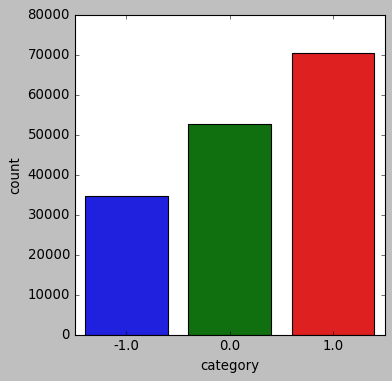

In [38]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='category', data = df_copy)

In [39]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df_copy, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 126488
No. of testing examples: 31622


In [40]:
vect = CountVectorizer(ngram_range=(1,2)).fit(training_data['clean_text'])
vect

CountVectorizer(ngram_range=(1, 2))

In [41]:
feature_names = vect.get_feature_names()
print("number of features:   {}\n".format(len(feature_names)))

print("20 of features :  {}\n".format((feature_names[:20])))

number of features:   1000460

20 of features :  ['000', '000 00000', '000 21000', '000 buy', '000 clean', '000 crore', '000 crs', '000 deaths', '000 income', '000 knowledge', '000 modi', '000 month', '000 per', '000 poor', '000 problem', '000 promised', '000 vanautunear', '000 year', '0000', '0000 seat']



In [42]:
X = training_data['clean_text']
Y = training_data['category']

xtest = testing_data['clean_text']
ytest = testing_data['category']


## tranform 
#### every word will be arranged in alphabetically order and they will be the columns of our matrix
#### every sentence will be row and these digits shows how many number of words are there in sentece

examole is
[ “One Geek helps Two Geeks”,
“Two Geeks help Four Geeks”, 
“Each Geek helps many other Geeks at GeeksforGeeks.”]

	       at  	each	four	geek	geeks	geeksforgeeks	help	helps	many	one	other	two
document[0]	0 	0	     0	   1	   1	   0	            0	    1    	0	    1	    0	1
document[1]	0	0	     1	   0	   2 	   0	            1	    0	    0	    0	    0	1
document[2]	1	1	     0	   1	   1	   1    	        0	    1	    1	    0	    1	0



In [43]:
## we are converting text into vectors ( a sparse matrix)
X = vect.transform(X)
xtest = vect.transform(xtest)

In [44]:
X[0]

<1x1000460 sparse matrix of type '<class 'numpy.int64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [45]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 42) 

In [46]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(type(X_train))

(101190, 1000460)
(25298, 1000460)
(101190,)
(25298,)
<class 'scipy.sparse.csr.csr_matrix'>


In [47]:
logreg = LogisticRegression()
logreg.fit(X,Y)
logreg_pred = logreg.predict(xtest)
logreg_accuracy = accuracy_score(logreg_pred , ytest)
print("test accuracy : {:.2f}%".format(logreg_accuracy*100))

test accuracy : 89.70%


D:\00Installation\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
print(confusion_matrix(ytest , logreg_pred))
print('\n')
print(classification_report(ytest, logreg_pred))

[[ 5515   615   786]
 [  141 10274   197]
 [  628   891 12575]]


              precision    recall  f1-score   support

        -1.0       0.88      0.80      0.84      6916
         0.0       0.87      0.97      0.92     10612
         1.0       0.93      0.89      0.91     14094

    accuracy                           0.90     31622
   macro avg       0.89      0.89      0.89     31622
weighted avg       0.90      0.90      0.90     31622



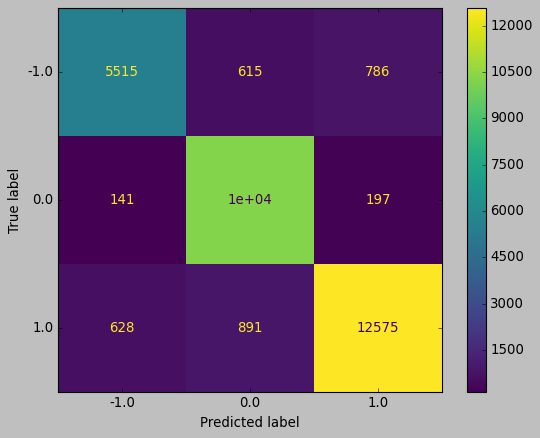

In [49]:
style.use('classic')
cm = confusion_matrix(ytest , logreg_pred , labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = logreg.classes_)
disp.plot()

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid = {'C':[0.001 , 0.01 , 0.1 ,10]}
grid = GridSearchCV(LogisticRegression() , param_grid)
grid.fit(X , Y)

D:\00Installation\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\00Installation\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 10]})

In [52]:
print("Best Parameter:",grid.best_params_)

Best Parameter: {'C': 10}


In [53]:
Y_pred = grid.predict(xtest)

In [54]:
logreg_accuracy = accuracy_score(Y_pred , ytest)
print("test accuracy : {:.2f}%".format(logreg_accuracy*100))

test accuracy : 89.82%


In [55]:
print(confusion_matrix(ytest , logreg_pred))
print('\n')
print(classification_report(ytest, logreg_pred))

[[ 5515   615   786]
 [  141 10274   197]
 [  628   891 12575]]


              precision    recall  f1-score   support

        -1.0       0.88      0.80      0.84      6916
         0.0       0.87      0.97      0.92     10612
         1.0       0.93      0.89      0.91     14094

    accuracy                           0.90     31622
   macro avg       0.89      0.89      0.89     31622
weighted avg       0.90      0.90      0.90     31622



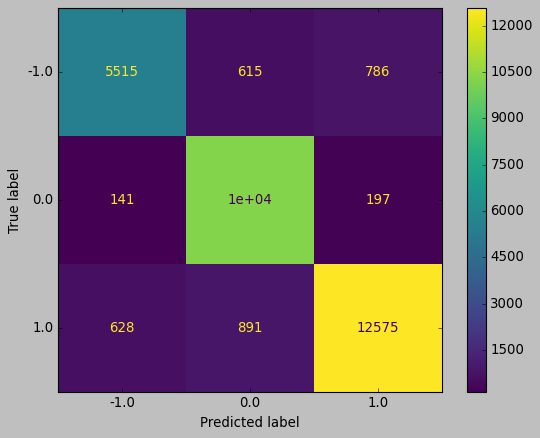

In [56]:
style.use('classic')
cm = confusion_matrix(ytest , logreg_pred , labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = logreg.classes_)
disp.plot()

In [57]:
from sklearn.svm import LinearSVC

In [58]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train , Y_train)

LinearSVC()

In [59]:
svc_pred = SVCmodel.predict(X_test)
svc_accuracy = accuracy_score(svc_pred , Y_test)
print("test accuracy : {:.2f}%".format(svc_accuracy*100))

test accuracy : 89.68%


In [60]:
pol = vect.transform(["the dude was doing the deed when I found him at a much worse position in the hsitory of time but still its not worthit to vote him"])

In [61]:
logreg.predict(pol)

array([-1.])

In [36]:
print(pol)

  (0, 231421)	1
  (0, 266925)	1
  (0, 336269)	1
  (0, 595970)	1
  (0, 597186)	1
  (0, 692104)	1
  (0, 851050)	1
  (0, 903399)	1
  (0, 951633)	1
  (0, 984588)	1


In [16]:
from sklearn import model_selection, datasets
import pickle

In [3]:
with open('logisticRegression_model_pickle','wb')as f:
    pickle.dump(logreg,f)

NameError: name 'logreg' is not defined

In [17]:
with open('logisticRegression_model_pickle','rb')as f:
    model = pickle.load(f)

    # then use model.predict()

EOFError: Ran out of input

In [9]:
model.predict(vect.transform(["thats is a cool move i gotta say"]))

NameError: name 'model' is not defined